In [1]:
import pandas as pd
import numpy as np

In [2]:
mri_csv = pd.read_csv('archive/oasis_longitudinal.csv')
mri_csv['Group'].replace('Converted', 'Demented', inplace=True)

In [3]:
mri_csv.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [4]:
mri_csv = mri_csv.fillna(mri_csv.mean())
mri_csv

/var/folders/25/hkg7hrfn7130z9vkbc1z1h580000gn/T/ipykernel_8593/2516103592.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mri_csv = mri_csv.fillna(mri_csv.mean())


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [5]:
from sklearn import preprocessing

In [6]:
X = mri_csv.iloc[:, 5:]
le_X = preprocessing.LabelEncoder()
le_X.fit(X['M/F'])
X['M/F'] = le_X.transform(X['M/F'])
X = X.drop('Hand', axis=1)
X.head()

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [7]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X

array([[ 1.15379808,  1.30873772, -0.20813199, ...,  2.83605891,
        -0.90516867, -2.2657425 ],
       [ 1.15379808,  1.43978716, -0.20813199, ...,  2.93270307,
        -1.30964265, -2.31650145],
       [ 1.15379808, -0.26385558, -0.90439416, ...,  1.07940909,
         0.17342861, -1.08378418],
       ...,
       [-0.86670278, -2.09854775, -0.55626308, ..., -0.96148827,
         1.92614919,  0.98283006],
       [-0.86670278, -1.83644887, -0.55626308, ..., -0.91600866,
         1.79132453,  0.92481984],
       [-0.86670278, -1.57434999, -0.55626308, ..., -0.88189896,
         1.92614919,  0.88131217]])

In [8]:
from sklearn.decomposition import PCA
X_projected = {}

In [9]:
for i in range(2, 9, 2):
    pca = PCA(i)
    pca.fit(X)

    X_projected[i] = pca.transform(X)
X_projected

{2: array([[-3.57522476e+00, -2.02598715e-01],
        [-3.68938632e+00, -5.04467189e-01],
        [-1.54521796e+00,  1.19954374e+00],
        [-1.90547480e+00,  6.43801239e-01],
        [-1.99685553e+00,  1.71653270e+00],
        [ 1.84365579e+00, -3.53008956e-01],
        [ 1.96581688e+00, -2.36721226e-01],
        [-1.16625251e+00,  5.38506005e-01],
        [-1.40661434e+00,  1.12823386e+00],
        [-1.27293797e+00,  3.67836671e-01],
        [ 3.33203467e-01, -1.79148779e-03],
        [-8.65484999e-02,  1.05165922e+00],
        [-2.83023613e-01,  1.22627691e+00],
        [ 1.44376482e+00, -2.83453281e-01],
        [ 1.53625267e+00, -1.40914929e-01],
        [ 3.54451972e-01, -9.14753798e-02],
        [ 1.63932119e-03,  4.79537005e-01],
        [ 1.34384415e+00, -1.48033979e-01],
        [ 9.46410874e-01,  1.50637253e-01],
        [ 1.34284034e+00, -1.13050513e+00],
        [ 1.31607628e+00, -1.00377597e+00],
        [ 1.13866370e+00, -7.81615599e-01],
        [ 2.67688256e+00,  3.

In [10]:
y = mri_csv['Group']
le_y = preprocessing.LabelEncoder()
le_y.fit(y)
y = le_y.transform(y)
y[0:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [11]:
algorithms = {}

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy', 'roc_auc']

def algorithms_by_pca(alg, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
    clf = alg.fit(X_train, y_train)
    scores = cross_validate(clf, X, y, scoring=scoring)

    df = pd.DataFrame(data=[scores['test_accuracy'].mean(), scores['test_recall_macro'].mean(),
                    scores['test_precision_macro'].mean(), scores['test_roc_auc'].mean(), scores['test_f1_macro'].mean()],
                index=["accuracy", "recall", "precision", "roc_auc_score", "f1"])
    return df

NAIVE BAYES

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
df_nb = pd.DataFrame()
for i in X_projected:
    df_nb[i] = algorithms_by_pca(gnb, X_projected[i], y)
algorithms['Naive Bayes'] = df_nb
df_nb

,2,4,6,8
accuracy,0.782739,0.830883,0.860360,0.900649
recall,0.780753,0.828552,0.858586,0.899589
precision,0.794471,0.847928,0.871282,0.906360
roc_auc_score,0.870144,0.914090,0.923214,0.930034
f1,0.779006,0.825714,0.857959,0.899818


DECISION TREE

In [19]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
df_dt = pd.DataFrame()
for i in X_projected:
    df_dt[i] = algorithms_by_pca(clf, X_projected[i], y)
algorithms['Decision Tree'] = df_dt
df_dt

,2,4,6,8
accuracy,0.731928,0.820360,0.828324,0.822955
recall,0.731705,0.819776,0.827446,0.822764
precision,0.733388,0.825410,0.835492,0.834254
roc_auc_score,0.731705,0.819776,0.827446,0.822764
f1,0.731173,0.819453,0.826385,0.821169


Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

df_rf = pd.DataFrame()
for i in X_projected:
    df_rf[i] = algorithms_by_pca(clf, X_projected[i], y)
algorithms['Random Forest'] = df_rf
df_rf

,2,4,6,8
accuracy,0.782775,0.854883,0.833658,0.892685
recall,0.781397,0.852734,0.832049,0.891331
precision,0.799061,0.871869,0.846395,0.900679
roc_auc_score,0.861876,0.902479,0.912864,0.920476
f1,0.778592,0.851341,0.830841,0.891706


SVM

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
df_svm = pd.DataFrame()
for i in X_projected:
    df_svm[i] = algorithms_by_pca(clf, X_projected[i], y)
algorithms['SVM'] = df_svm
df_svm

,2,4,6,8
accuracy,0.782883,0.922234,0.941045,0.943712
recall,0.781765,0.921440,0.940224,0.942856
precision,0.793516,0.926014,0.945301,0.948063
roc_auc_score,0.867378,0.950047,0.946645,0.947495
f1,0.780159,0.921931,0.940759,0.943422


AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

df_ada = pd.DataFrame()
for i in X_projected:
    df_ada[i] = algorithms_by_pca(clf, X_projected[i], y)
algorithms['AdaBoost'] = df_ada
df_ada

,2,4,6,8
accuracy,0.742775,0.855135,0.879351,0.908901
recall,0.742228,0.854777,0.879263,0.908574
precision,0.747206,0.858867,0.882556,0.911948
roc_auc_score,0.831899,0.919875,0.929817,0.956780
f1,0.740862,0.854305,0.878982,0.908679


Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1, max_iter=100000)
df_lr = pd.DataFrame()
for i in X_projected:
    df_lr[i] = algorithms_by_pca(clf, X_projected[i], y)
algorithms['Logistic Regression'] = df_lr
print(df_lr)

                      2         4         6         8
accuracy       0.799027  0.940973  0.946378  0.946378
recall         0.798214  0.940371  0.945488  0.945488
precision      0.804439  0.943364  0.950969  0.950969
roc_auc_score  0.888494  0.956053  0.960716  0.967006
f1             0.797425  0.940788  0.946086  0.946086


In [24]:
from scipy.interpolate import interp1d

In [25]:
def get_graph(i):
    algo_smooth = {}
    for alg in algorithms:
        df = algorithms[alg]
        f = interp1d(df.columns, df.iloc[i].values, kind = "cubic")

        x_dense = np.linspace(2, 8, 100)
        y_dense = f(x_dense)
        algo_smooth[alg] = (x_dense, y_dense)
    return algo_smooth

algo_accuracy = get_graph(0)

algo_accuracy

{'Naive Bayes': (array([2.        , 2.06060606, 2.12121212, 2.18181818, 2.24242424,
         2.3030303 , 2.36363636, 2.42424242, 2.48484848, 2.54545455,
         2.60606061, 2.66666667, 2.72727273, 2.78787879, 2.84848485,
         2.90909091, 2.96969697, 3.03030303, 3.09090909, 3.15151515,
         3.21212121, 3.27272727, 3.33333333, 3.39393939, 3.45454545,
         3.51515152, 3.57575758, 3.63636364, 3.6969697 , 3.75757576,
         3.81818182, 3.87878788, 3.93939394, 4.        , 4.06060606,
         4.12121212, 4.18181818, 4.24242424, 4.3030303 , 4.36363636,
         4.42424242, 4.48484848, 4.54545455, 4.60606061, 4.66666667,
         4.72727273, 4.78787879, 4.84848485, 4.90909091, 4.96969697,
         5.03030303, 5.09090909, 5.15151515, 5.21212121, 5.27272727,
         5.33333333, 5.39393939, 5.45454545, 5.51515152, 5.57575758,
         5.63636364, 5.6969697 , 5.75757576, 5.81818182, 5.87878788,
         5.93939394, 6.        , 6.06060606, 6.12121212, 6.18181818,
         6.24242424

In [26]:
from matplotlib.pyplot import plot, grid, legend, xlabel, ylabel, ylim, title, xticks, figure
import matplotlib.pyplot as plt
colors = plt.cm.get_cmap("Dark2")

def paint_graph(algo_values, col_name):
    plt.clf()


    figure(figsize=(12, 6))
    for i, alg in enumerate(algo_values):
        x_dense, y_dense = algo_values[alg]
        plot(x_dense, y_dense, color=colors(i), markerfacecolor='blue', label=alg, linewidth=3.0)

    grid() # сетка
    legend(loc='best', fontsize=16)

    #Подписи для осей:
    xlabel('Feature dimension generated by PCA', fontsize=14)
    # повернём подпись на 90 градусов
    ylabel(col_name, fontsize=14)
    ylim(0, 1.2)
    xticks(rotation=45, ha='right')

<Figure size 640x480 with 0 Axes>

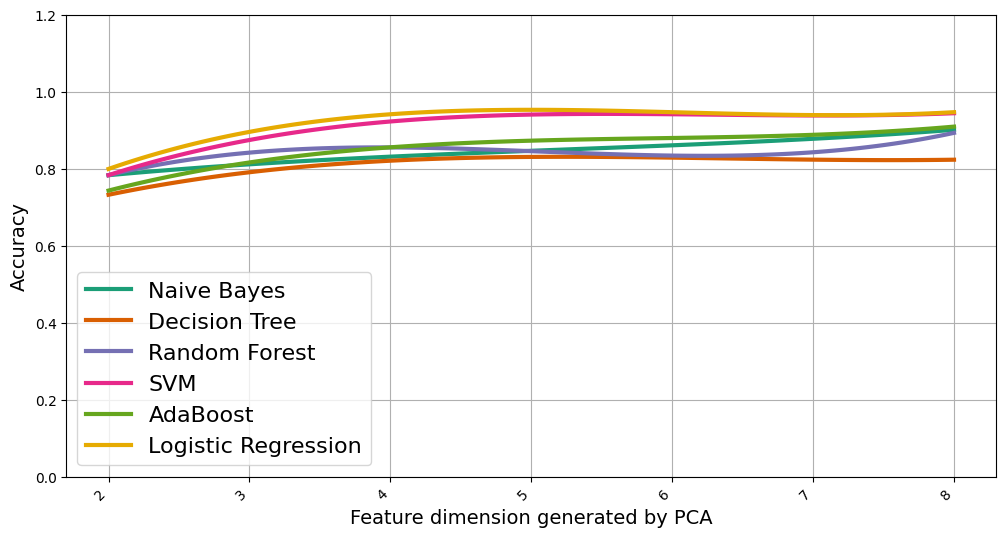

In [27]:
paint_graph(algo_accuracy, 'Accuracy')

<Figure size 640x480 with 0 Axes>

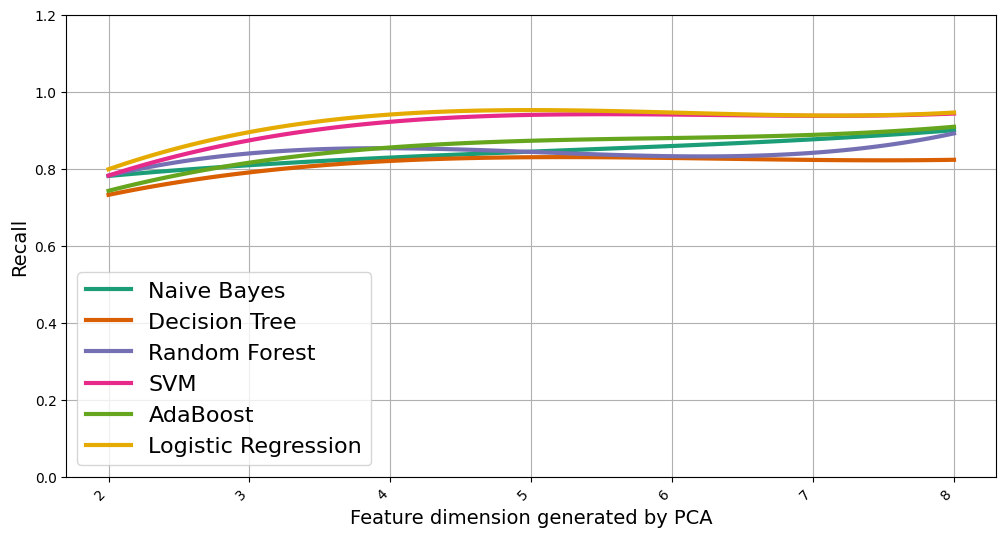

In [28]:
algo_recall = get_graph(1)
paint_graph(algo_recall, 'Recall')

<Figure size 640x480 with 0 Axes>

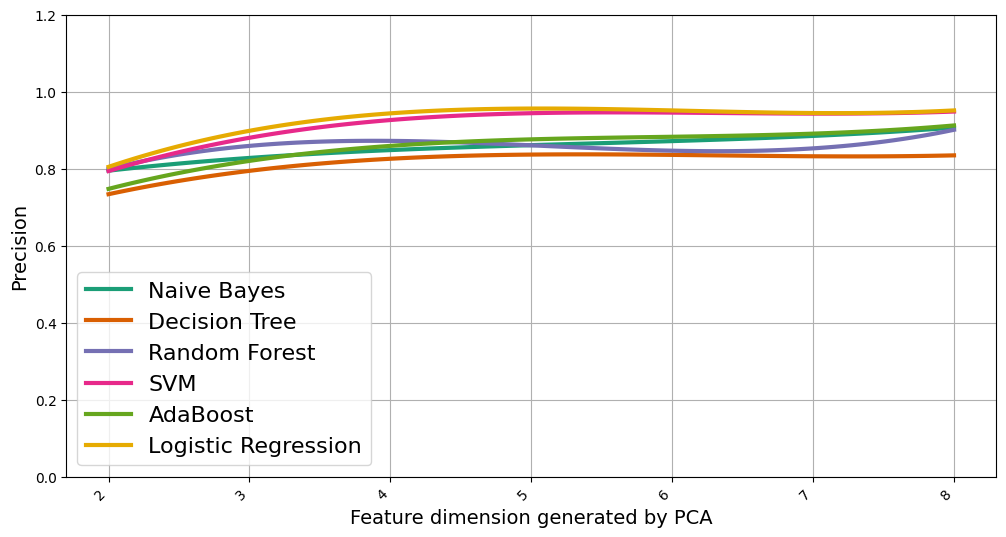

In [29]:
algo_precision = get_graph(2)
paint_graph(algo_precision, 'Precision')

<Figure size 640x480 with 0 Axes>

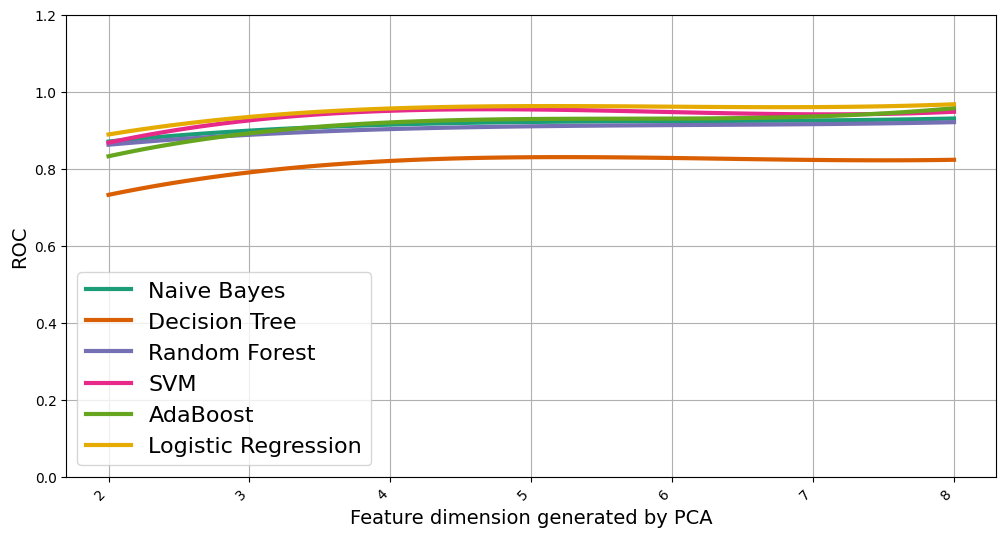

In [30]:
algo_roc = get_graph(3)
paint_graph(algo_roc, 'ROC')

<Figure size 640x480 with 0 Axes>

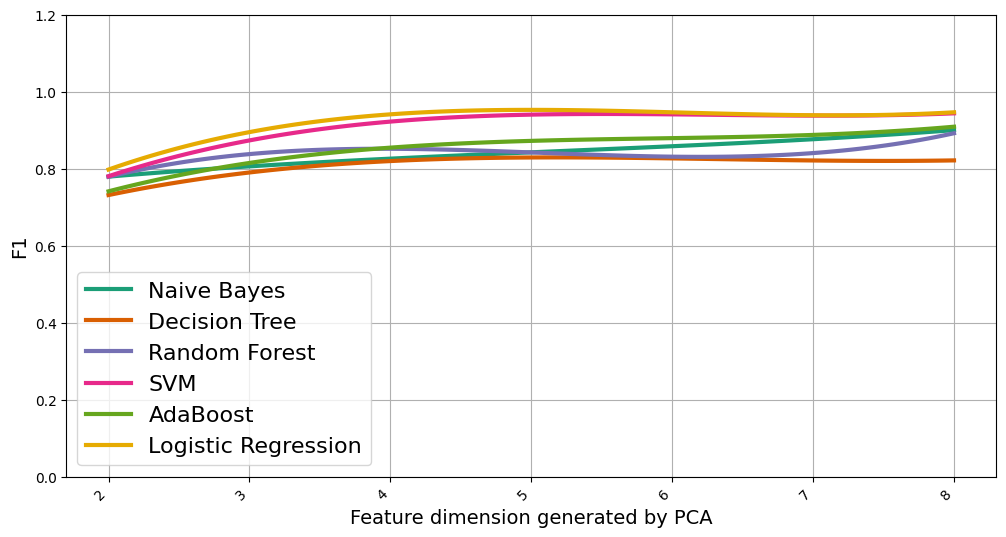

In [31]:
algo_f1 = get_graph(4)
paint_graph(algo_f1, 'F1')